In [1]:
##Import neccessary librabries to make our project sucessfull
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
import numpy as np

#Load the csv file and inpect them
filepath = "Nairobi Kenya 2024-05-14 to 2025-05-14.csv"
df = pd.read_csv(filepath)

df.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Nairobi, Kenya",2024-05-14,77.2,61.0,68.9,77.2,61.0,68.9,58.3,70.8,...,20.2,8,10,2024-05-14T06:27:20,2024-05-14T18:30:53,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,HKNW,63740099999,63742099999"
1,"Nairobi, Kenya",2024-05-15,78.0,62.6,69.4,78.0,62.6,69.4,59.1,71.3,...,19.9,7,10,2024-05-15T06:27:22,2024-05-15T18:30:53,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,HKNW,63740099999,63742099999"
2,"Nairobi, Kenya",2024-05-16,79.6,61.0,68.4,79.6,61.0,68.4,59.5,75.1,...,18.2,7,10,2024-05-16T06:27:24,2024-05-16T18:30:53,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"HKJK,63741099999,HKNW,63740099999,63742099999"
3,"Nairobi, Kenya",2024-05-17,78.8,60.1,68.7,78.8,60.1,68.7,60.4,76.7,...,19.1,8,10,2024-05-17T06:27:27,2024-05-17T18:30:54,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"HKJK,63741099999,HKNW,63740099999,63742099999"
4,"Nairobi, Kenya",2024-05-18,79.1,62.4,69.9,79.1,62.4,69.9,60.6,74.2,...,19.9,8,10,2024-05-18T06:27:31,2024-05-18T18:30:55,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,remote,HKNW,63740099999,63742..."


In [4]:
df.columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [28]:
# Preprocess the dataset
df =pd.read_csv(filepath)
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Select features and target variables
features = ['dew', 'windgust', 'windspeed', 'cloudcover','solarradiation'] 
target = ['tempmax', 'tempmin', 'humidity', 'precip']

#remove rows with Null values
df = df.dropna(subset=features + target)

x = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

#Evaluate the model
scores = {target: r2_score(y_test[target], y_pred[:, i]) for i, target in enumerate(y.columns)}
errors = {target: mean_squared_error(y_test[target], y_pred[:, i]) for i, target in enumerate(y.columns)}

scores, errors

({'tempmax': 0.6477031358698249,
  'tempmin': 0.45787730842950713,
  'humidity': 0.7989106113531345,
  'precip': -0.032628487838983755},
 {'tempmax': 4.3929340945946,
  'tempmin': 4.685745810810814,
  'humidity': 16.321340175675644,
  'precip': 0.015168393190540535})

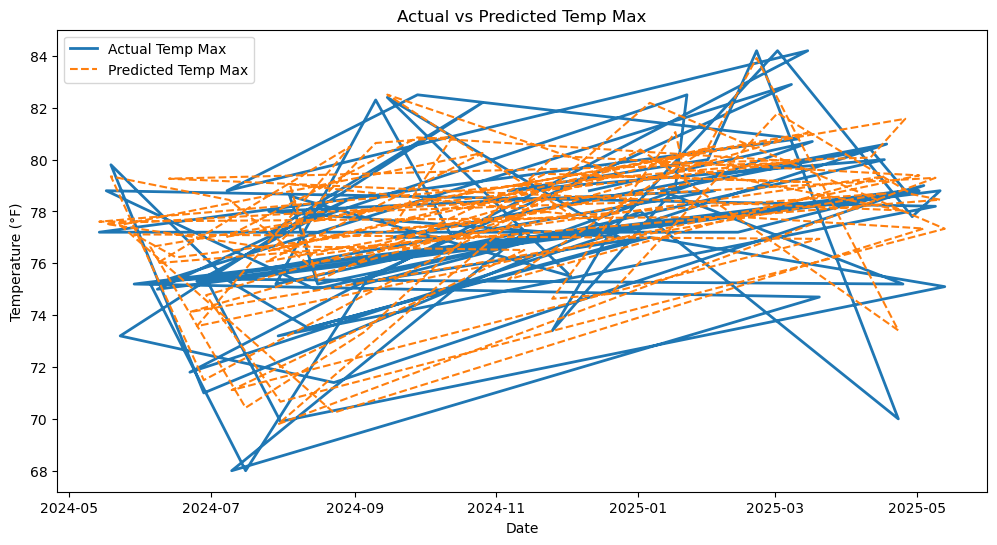

In [29]:
# Plot actual vs predicted for tempmax
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test['tempmax'], label='Actual Temp Max', linewidth=2)
plt.plot(y_test.index, y_pred[:, 0], label='Predicted Temp Max', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.title('Actual vs Predicted Temp Max')

plot_path= "tempmax_plot.png"
plt.savefig(plot_path)

'sampled_forecast_plot.png'

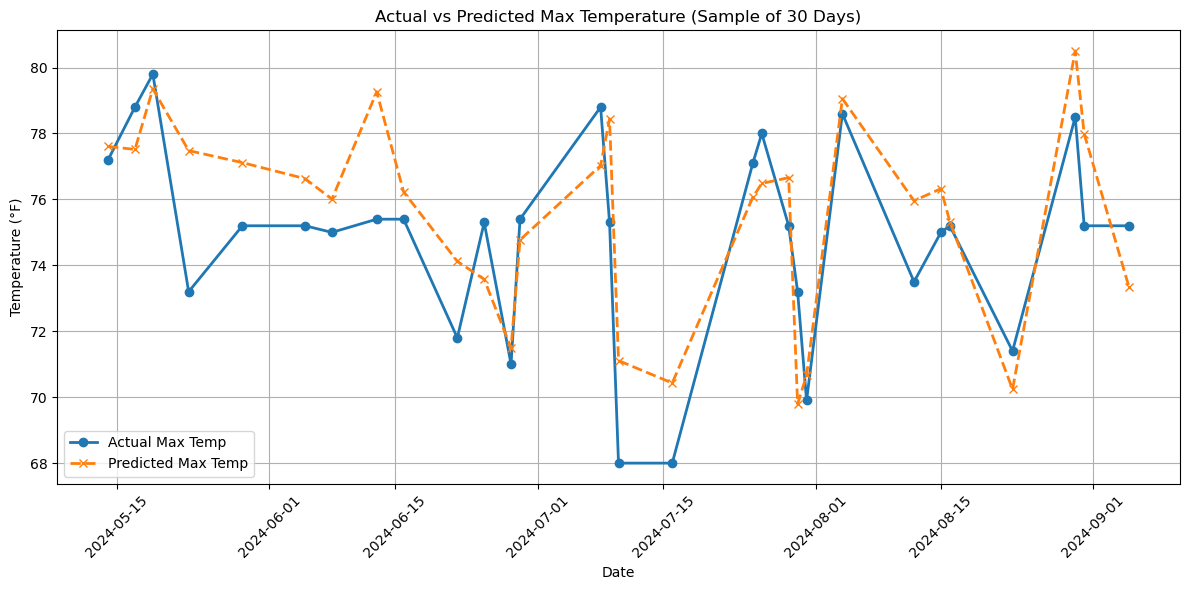

In [31]:
# Improve the plot: sort by date and limit to the top 30 predictions for clarity
plot_data = y_test.copy()
plot_data['pred_tempmax'] = y_pred[:, 0]
plot_data = plot_data.sort_index().head(30)

# Create improved plot
plt.figure(figsize=(12, 6))
plt.plot(plot_data.index, plot_data['tempmax'], marker='o', label='Actual Max Temp', linewidth=2)
plt.plot(plot_data.index, plot_data['pred_tempmax'], marker='x', linestyle='--', label='Predicted Max Temp', linewidth=2)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Actual vs Predicted Max Temperature (Sample of 30 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
sampled_plot_path = "sampled_forecast_plot.png"
plt.savefig(sampled_plot_path)

sampled_plot_path
